# Customizing Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

The simplest colorbar can be created with `plt.colorbar()`

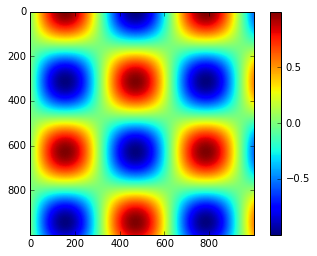

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars

The colormap can be specified using `cmap` argument

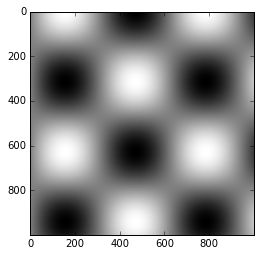

In [3]:
plt.imshow(I, cmap='gray');

All the available colormaps are in the `plt.cm` namespace

In [4]:
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'MutableMapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_DeprecatedCmapDictWrapper',
 '_LUTSIZE',
 '__builtin_cmaps',
 '__builtins__',
 '__cached__',
 '__doc__',

### Choosing the Colormap

A good reference is [here](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

We should be aware of three different categories of colormaps:
- Sequential colormaps: These are made up of one continuous sequence of colors (e.g. `binary` or `viridis`)
- Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`)
- Qualitative colormaps: these mix colors with no particular sequence (e.g. `rainbow` or `jet`)

### Color limits and extensions

The colorbar is simply an instance of `plt.Axes`, so all the axes and tick formatting are applicable. For example, the `extent` property allows us to indicate out-of-bounds values.

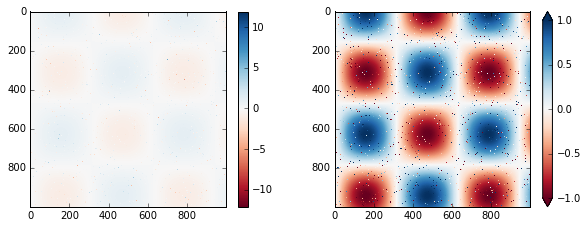

In [5]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

We manually set the color limits for the right figure, the result is a much more useful visualization for our data.

### Discrete Color Bars

By default, colormaps are continuous, but sometimes we would like to represent discrete values. To do see, we can use `plt.cm.get_cmap()` with the number of desired bins

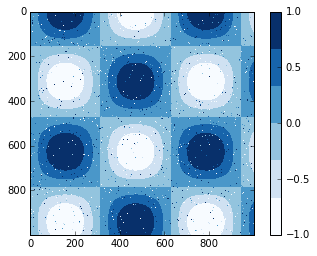

In [6]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Example: Handwritten Digits

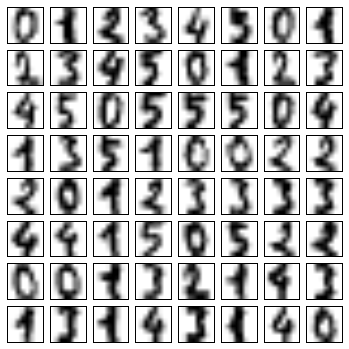

In [7]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Each digit is 64 pixels, so we can consider each digit to be a point lying in a 64-dimensional space. Visualizing with that number of dimensions may be tricky, so we want to reduce it with techniques such as manifold learning. It is an example of unsupervised machine learning.

In [29]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=5)
projection = iso.fit_transform(digits.data)

/home/tomperr/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/tomperr/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


We use discrete colormaps to view the results

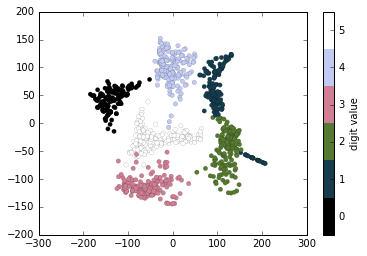

In [30]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)